In [17]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge scikit-surprise

Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.07.19-haa95532_0, anaconda/win-64::certifi-2022.9.14-py39haa95532_0, anaconda/win-64::openssl-1.1.1q-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.07.19-haa95532_0, anaconda/win-64::certifi-2022.9.14-py39haa95532_0, defaults/win-64::openssl-1.1.1q-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.07.19-haa95532_0, anaconda/win-64::openssl-1.1.1q-h2bbff1b_0, defaults/win-64::certifi-2022.9.14-py39haa95532_0
  - anaconda/win-64::ca-certificates-2022.07.19-haa95532_0, defaults/win-64::certifi-2022.9.14-py39haa95532_0, defaults/win-64::openssl-1.1.1q-h2bbff1b_0
  - anaconda/win-64::

In [48]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD, KNNBasic, KNNWithMeans, accuracy
from surprise.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

# Task 2 -Q3-a
# Input file path
path = './movie_data/'

# Input data
data = pd.read_csv(path+'ratings_small.csv')

In [10]:
# Load the data into Surprise Dataset format
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], Reader())

In [11]:
#Task 2-Q3-b~c
# Define algorithms
svd = SVD()
user_based = KNNBasic(sim_options={'user_based': True})
item_based = KNNBasic(sim_options={'user_based': False})

# Perform cross-validation
algos = [svd, user_based, item_based]
for algo in algos:
    results = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    print(f"Algorithm: {algo.__class__.__name__}")
    print(f"Avg. MAE: {sum(results['test_mae'])/len(results['test_mae']):.4f}")
    print(f"Avg. RMSE: {sum(results['test_rmse'])/len(results['test_rmse']):.4f}")
    print("------")

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6956  0.6966  0.6910  0.6848  0.6849  0.6906  0.0050  
RMSE (testset)    0.8999  0.9068  0.8977  0.8919  0.8897  0.8972  0.0061  
Fit time          4.98    4.99    4.89    4.81    5.72    5.08    0.33    
Test time         0.14    0.17    0.13    0.18    0.14    0.15    0.02    
Algorithm: SVD
Avg. MAE: 0.6906
Avg. RMSE: 0.8972
------
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)  

In [45]:
# Task 2-Q3-d (ompare performances)
# Compare performances

# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(0.5, 5.0))
data2 = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

#Task 2-Q3-d
# Define algorithms
svd = SVD()
user_based = KNNBasic(sim_options={'user_based': True})
item_based = KNNWithMeans(sim_options={'user_based': False})

# Perform cross-validation
algos = [svd, user_based, item_based]
avg_mae = {}
avg_rmse = {}
for algo in algos:
    results = cross_validate(algo, data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    print(f"Algorithm: {algo.__class__.__name__}")
    print(f"Avg. MAE: {np.mean(results['test_mae']):.4f}")
    print(f"Avg. RMSE: {np.mean(results['test_rmse']):.4f}")
    print("------")
    avg_mae[algo.__class__.__name__] = np.mean(results['test_mae'])
    avg_rmse[algo.__class__.__name__] = np.mean(results['test_rmse'])

# Print results
print("Average MAE:")
for algo, mae in avg_mae.items():
    print(f"{algo}: {mae}")

print("\nAverage RMSE:")
for algo, rmse in avg_rmse.items():
    print(f"{algo}: {rmse}")

# Find the best algorithm
best_mae_algo = min(avg_mae, key=avg_mae.get)
best_rmse_algo = min(avg_rmse, key=avg_rmse.get)
print(f"\nBest algorithm based on MAE: {best_mae_algo}")
print(f"Best algorithm based on RMSE: {best_rmse_algo}")

# min_mae = min(results['test_mae'])
#min_rmse = min(results['test_rmse'])
#print(f"Min. MAE: {min_mae:.4f}")
#print(f"Min. RMSE: {min_rmse:.4f}")
#print(f"Best algorithm: {algo.__class__.__name__} with MAE: {min_mae:.4f} and RMSE: {min_rmse:.4f}.")

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6961  0.6839  0.6910  0.6985  0.6904  0.6920  0.0050  
RMSE (testset)    0.8998  0.8905  0.8965  0.9071  0.8977  0.8983  0.0054  
Fit time          5.11    4.83    4.87    5.08    4.91    4.96    0.11    
Test time         0.21    0.19    0.12    0.19    0.18    0.18    0.03    
Algorithm: SVD
Avg. MAE: 0.6920
Avg. RMSE: 0.8983
------
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)  

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7694  0.7711  0.7653  0.7783  0.7624  0.7693  0.0054  
RMSE (testset)    0.9963  0.9996  0.9932  1.0062  0.9852  0.9961  0.0070  
Fit time          0.77    0.71    0.70    0.87    0.69    0.75    0.07    
Test time         1.49    1.58    1.66    1.48    1.73    1.59    0.10    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

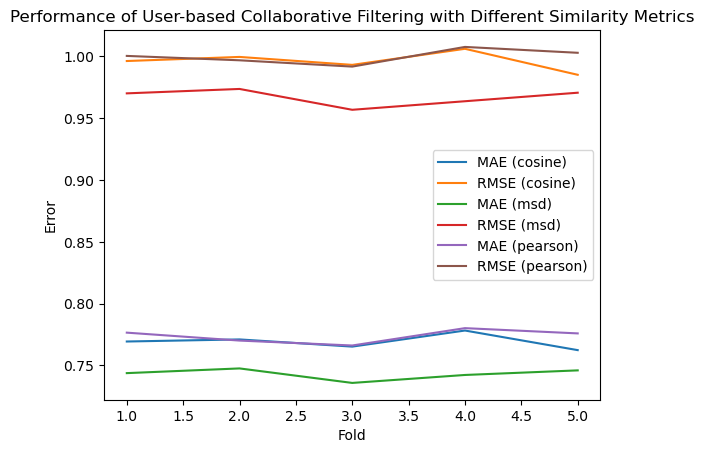

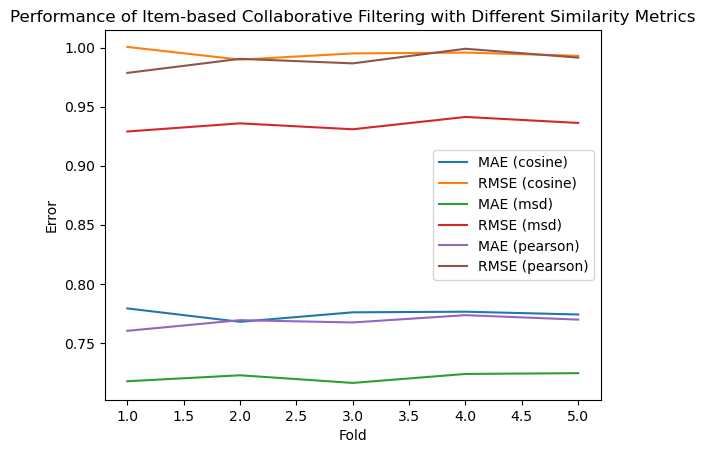

In [49]:
# Task 2-Q3-e

# Define similarity metrics
similarity_metrics = ['cosine', 'msd', 'pearson']

# Perform cross-validation for User-based Collaborative Filtering
user_based_results = {}
for similarity in similarity_metrics:
    algo = KNNBasic(sim_options={'user_based': True, 'name': similarity})
    results = cross_validate(algo, data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    user_based_results[similarity] = results

# Perform cross-validation for Item-based Collaborative Filtering
item_based_results = {}
for similarity in similarity_metrics:
    algo = KNNBasic(sim_options={'user_based': False, 'name': similarity})
    results = cross_validate(algo, data2, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    item_based_results[similarity] = results

# Plot the results for User-based Collaborative Filtering
for similarity in similarity_metrics:
    plt.plot(range(1, 6), user_based_results[similarity]['test_mae'], label=f'MAE ({similarity})')
    plt.plot(range(1, 6), user_based_results[similarity]['test_rmse'], label=f'RMSE ({similarity})')

plt.xlabel('Fold')
plt.ylabel('Error')
plt.title('Performance of User-based Collaborative Filtering with Different Similarity Metrics')
plt.legend()
plt.show()

# Plot the results for Item-based Collaborative Filtering
for similarity in similarity_metrics:
    plt.plot(range(1, 6), item_based_results[similarity]['test_mae'], label=f'MAE ({similarity})')
    plt.plot(range(1, 6), item_based_results[similarity]['test_rmse'], label=f'RMSE ({similarity})')

plt.xlabel('Fold')
plt.ylabel('Error')
plt.title('Performance of Item-based Collaborative Filtering with Different Similarity Metrics')
plt.legend()
plt.show()


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

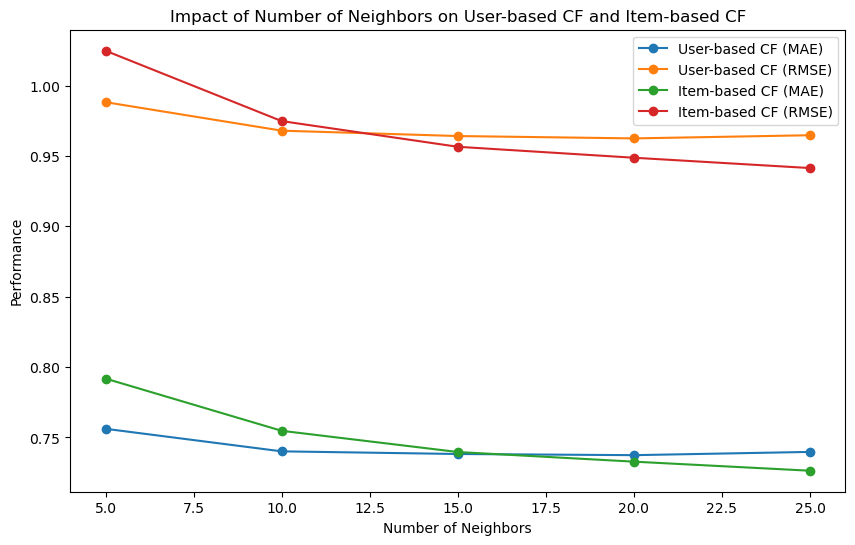

In [51]:
# Task 2-Q3-f

# Number of neighbors to test
n_neighbors = [5, 10, 15, 20, 25]

# Perform cross-validation for User-based Collaborative Filtering and Item-based Collaborative Filtering
user_based_mae = []
user_based_rmse = []
item_based_mae = []
item_based_rmse = []

for n in n_neighbors:
    user_based = KNNBasic(k=n, sim_options={'user_based': True})
    item_based = KNNBasic(k=n, sim_options={'user_based': False})
    results_user_based = cross_validate(user_based, data2, measures=['MAE', 'RMSE'], cv=5)
    results_item_based = cross_validate(item_based, data2, measures=['MAE', 'RMSE'], cv=5)
    user_based_mae.append(sum(results_user_based['test_mae'])/len(results_user_based['test_mae']))
    user_based_rmse.append(sum(results_user_based['test_rmse'])/len(results_user_based['test_rmse']))
    item_based_mae.append(sum(results_item_based['test_mae'])/len(results_item_based['test_mae']))
    item_based_rmse.append(sum(results_item_based['test_rmse'])/len(results_item_based['test_rmse']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, user_based_mae, marker='o', label='User-based CF (MAE)')
plt.plot(n_neighbors, user_based_rmse, marker='o', label='User-based CF (RMSE)')
plt.plot(n_neighbors, item_based_mae, marker='o', label='Item-based CF (MAE)')
plt.plot(n_neighbors, item_based_rmse, marker='o', label='Item-based CF (RMSE)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Performance')
plt.title('Impact of Number of Neighbors on User-based CF and Item-based CF')
plt.legend()
plt.show()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3238  1.3160  1.3124  1.3356  1.3186  1.3213  0.0081  
Fit time          0.66    0.68    0.75    0.69    0.90    0.73    0.09    
Test time         0.72    0.92    0.71    0.67    0.73    0.75    0.09    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix

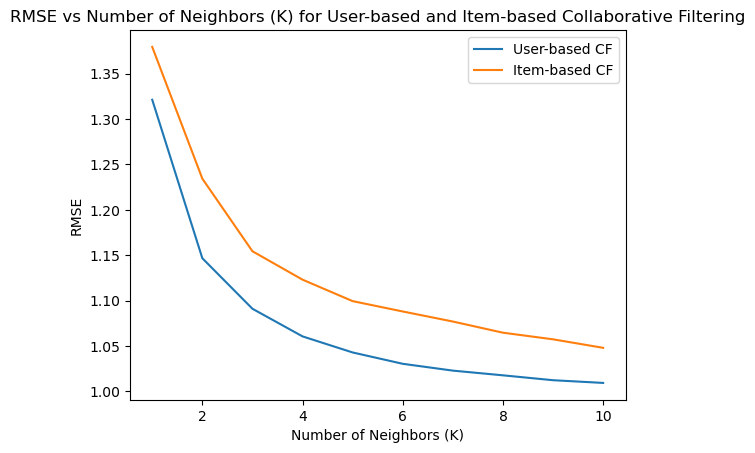

Best K for User-based Collaborative Filtering: 10
Best K for Item-based Collaborative Filtering: 10


In [53]:
# Task 2-Q3-g

# Define algorithms
user_based_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
item_based_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})

# Define range of K values to test
k_values = [i for i in range(1, 11)]

# Lists to store RMSE values for User-based and Item-based Collaborative Filtering
rmse_user_based = []
rmse_item_based = []

# Loop through different K values and perform cross-validation to get RMSE
for k in k_values:
    # Set the K value for User-based and Item-based algorithms
    user_based_cosine.k = k
    item_based_cosine.k = k

    # Perform cross-validation for User-based and Item-based algorithms
    results_user_based = cross_validate(user_based_cosine, data2, measures=['RMSE'], cv=5, verbose=True)
    results_item_based = cross_validate(item_based_cosine, data2, measures=['RMSE'], cv=5, verbose=True)

    # Get the average RMSE for User-based and Item-based algorithms
    avg_rmse_user_based = sum(results_user_based['test_rmse']) / len(results_user_based['test_rmse'])
    avg_rmse_item_based = sum(results_item_based['test_rmse']) / len(results_item_based['test_rmse'])

    # Append the RMSE values to the lists
    rmse_user_based.append(avg_rmse_user_based)
    rmse_item_based.append(avg_rmse_item_based)

# Plot the RMSE values for User-based and Item-based Collaborative Filtering
plt.plot(k_values, rmse_user_based, label='User-based CF')
plt.plot(k_values, rmse_item_based, label='Item-based CF')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Number of Neighbors (K) for User-based and Item-based Collaborative Filtering')
plt.show()

# Get the best K values for User-based and Item-based Collaborative Filtering
best_k_user_based = k_values[rmse_user_based.index(min(rmse_user_based))]
best_k_item_based = k_values[rmse_item_based.index(min(rmse_item_based))]

print(f"Best K for User-based Collaborative Filtering: {best_k_user_based}")
print(f"Best K for Item-based Collaborative Filtering: {best_k_item_based}")